In [79]:

!pip install matplotlib


In [80]:
!pip install numpy

In [81]:
!pip install seaborn

In [82]:
import numpy as np
import seaborn as sns
import statistics
import matplotlib.pyplot as pyplot
%matplotlib inline 
# above for diplaying the fgraph

In [83]:
# loading any dataset
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [84]:
sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [85]:
df = sns.load_dataset('tips')

In [86]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [87]:
## mean 

np.mean(df['total_bill'])

19.78594262295082

In [88]:
# median
np.median(df['total_bill'])

17.795

In [89]:
## mode
statistics.mode(df['total_bill'])

13.42

<Axes: >

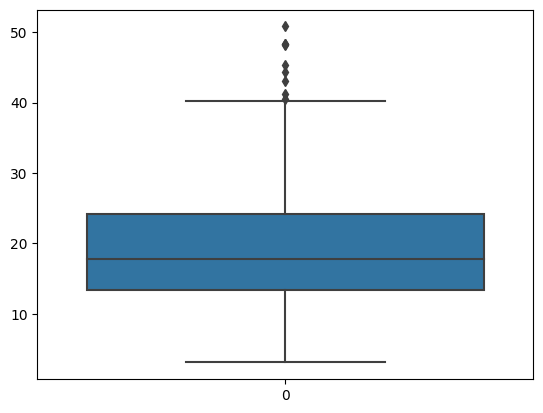

In [90]:
## Box plot
## We can use seaborn library

sns.boxplot(df['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

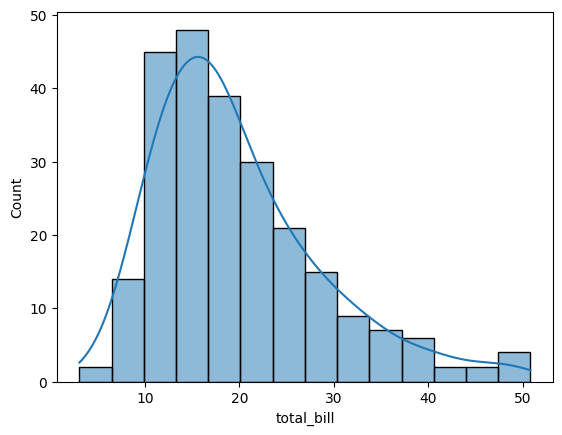

In [91]:
sns.histplot(df['total_bill'], kde= True)
# kde is used for smoothening 
# below graph looks lie log normal distribution


In [92]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [93]:
## With respect to categorical day
sns.countplot(df['day'])

ValueError: could not convert string to float: 'Sun'

In [ ]:
sns.countplot(df['sex'])

ValueError: could not convert string to float: 'Female'

In [ ]:
sns.countplot(df['time'])

ValueError: could not convert string to float: 'Dinner'

In [ ]:
sns.countplot(df['sex'])

ValueError: could not convert string to float: 'Female'

In [ ]:
np.percentile(df['total_bill'], [25,75])

array([13.3475, 24.1275])

In [ ]:
IQR = 24.1275 - 13.3475

In [ ]:
IQR

10.780000000000001

In [ ]:
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df1 = sns.load_dataset('iris')

In [ ]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df1.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
np.mean(df1['sepal_length'])

5.843333333333334

In [ ]:
np.median(df1['sepal_length'])

5.8

In [ ]:
np.percentile(df1['sepal_length'], [25,75])

array([5.1, 6.4])

In [ ]:
## outliers
## Define our dataset

dataset1 = [11,10,12,14,12,15,102,12,14,17,19,107,10,13,12,14,12,108,12,102,11,14,13,10,15,12,10,14,13,15,10]

<Axes: ylabel='Count'>

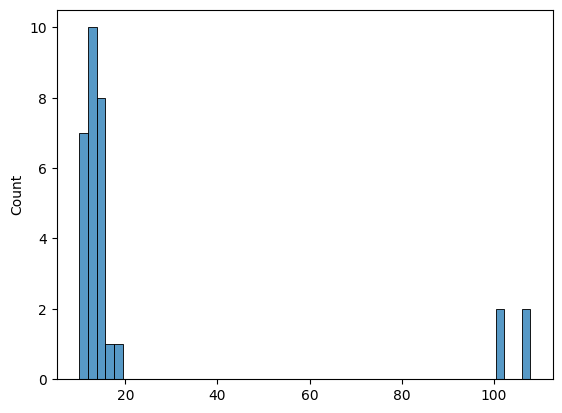

In [ ]:
sns.histplot(dataset1)

In [104]:
# how to calcualte the outliers
# using z - score 

outlier = []
def detect_outliers(data):
    threshold = 3 ### 3 standard deviation
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean)/ std 
        if np.abs(z_score) > threshold:
            outlier.append(i)
    return outlier

In [105]:
detect_outliers(dataset1)

[]

## Outliers using IQR
 1. Sort the data
 2. Calcualte Q1 and Q3
 3. IQR(Q1-Q3)
 4. Find the lower fence(q1 - 1.5iqr)
 5. Find the upper fence(q1 + 1.5iqr)

In [106]:
### outliers using IQR
dataset1


[11,
 10,
 12,
 14,
 12,
 15,
 102,
 12,
 14,
 17,
 19,
 107,
 10,
 13,
 12,
 14,
 12,
 108,
 12,
 102,
 11,
 14,
 13,
 10,
 15,
 12,
 10,
 14,
 13,
 15,
 10]

In [107]:
dataset1 = sorted(dataset1)

In [108]:
dataset1

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 17,
 19,
 102,
 102,
 107,
 108]

In [109]:
q1,q3 = np.percentile(dataset1,[25,75])

In [110]:
print(q1,q3)

12.0 15.0


In [111]:
iqr = q3 -q1

In [112]:
print(iqr)

3.0


In [114]:
## find the lower fence and upper fence

lower_fence = q1- (1.5*iqr)
higher_fence = q3 + (1.5*iqr)

In [115]:
print(lower_fence,higher_fence)

7.5 19.5
